Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


Data loading

In [2]:
churn_data = pd.read_csv('Churn_Modelling.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


check for null vaues

In [3]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Instead of creating different plots, i created one function. This saves memory as variables are removed after function exits

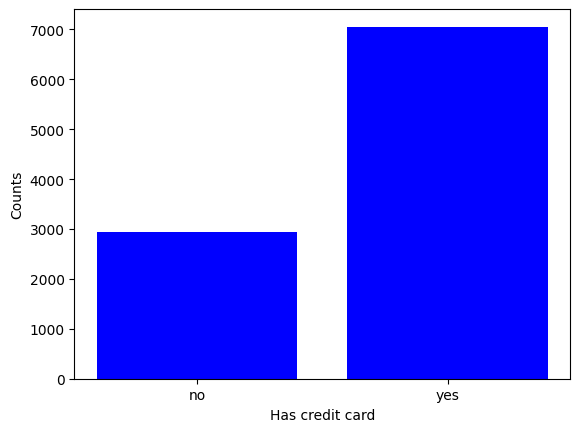

In [4]:
def hascrcardplot():
    hascrcount = churn_data['HasCrCard'].value_counts()
    hascrcount = pd.Series.to_dict(hascrcount)
    hascrcountkey = list(hascrcount.keys())
    hascrcountvalue = list(hascrcount.values())
    plt.bar(hascrcountkey,hascrcountvalue,color='blue')
    plt.xlabel('Has credit card')
    plt.ylabel('Counts')
    plt.xticks(hascrcountkey,['yes','no'])

hascrcardplot()

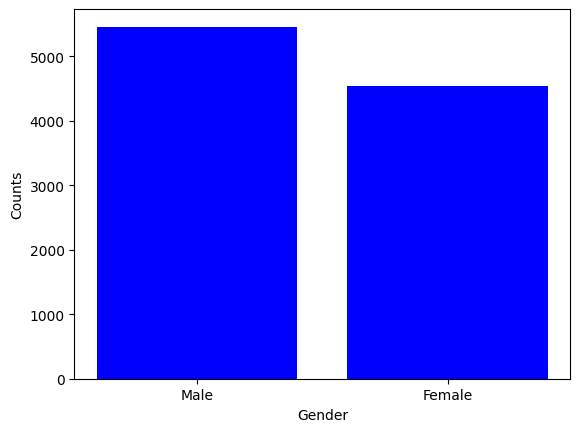

In [5]:
def genderplot():
    hascrcount = churn_data['Gender'].value_counts()
    hascrcount = pd.Series.to_dict(hascrcount)
    hascrcountkey = list(hascrcount.keys())
    hascrcountvalue = list(hascrcount.values())
    plt.bar(hascrcountkey,hascrcountvalue,color='blue')
    plt.xlabel('Gender')
    plt.ylabel('Counts')
    #plt.xticks(hascrcountkey,['yes','no'])

genderplot()

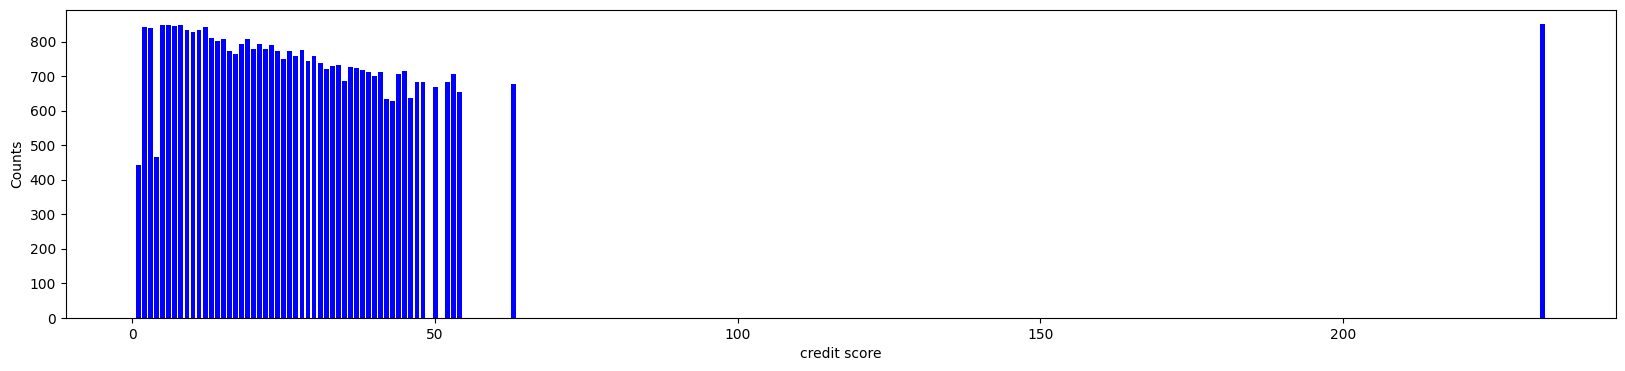

In [6]:
def creditsplot():
    hascrcount = churn_data['CreditScore'].value_counts()
    hascrcount = pd.Series.to_dict(hascrcount)
    hascrcountkey = list(hascrcount.keys())
    hascrcountvalue = list(hascrcount.values())
    fig = plt.figure(figsize=(20,4))
    plt.bar(hascrcountvalue,hascrcountkey,color='blue')
    plt.xlabel('credit score')
    plt.ylabel('Counts')
    #plt.xticks(hascrcountkey,['yes','no'])

creditsplot()

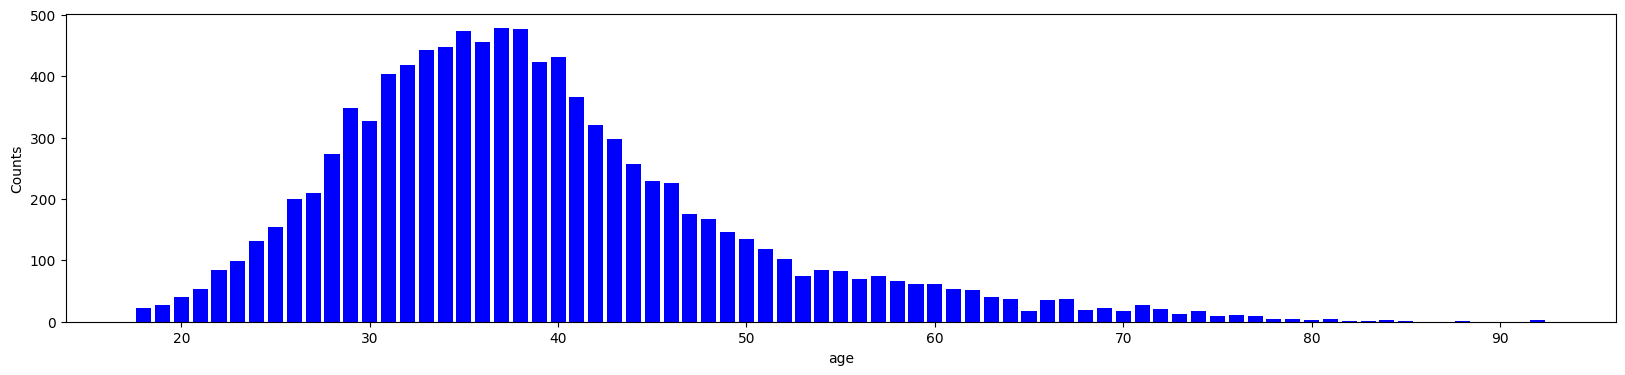

In [7]:
def ageplot():
    hascrcount = churn_data['Age'].value_counts()
    hascrcount = pd.Series.to_dict(hascrcount)
    hascrcountkey = list(hascrcount.keys())
    hascrcountvalue = list(hascrcount.values())
    fig = plt.figure(figsize=(20,4))
    plt.bar(hascrcountkey,hascrcountvalue,color='blue')
    plt.xlabel('age')
    plt.ylabel('Counts')
    #plt.xticks(hascrcountkey,['yes','no'])

ageplot()

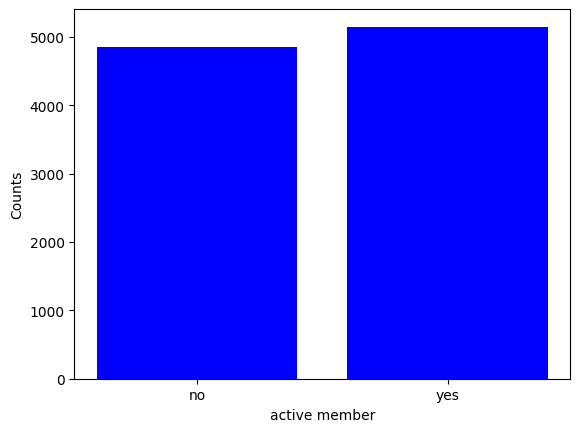

In [8]:
def creditsplot():
    hascrcount = churn_data['IsActiveMember'].value_counts()
    hascrcount = pd.Series.to_dict(hascrcount)
    hascrcountkey = list(hascrcount.keys())
    hascrcountvalue = list(hascrcount.values())
    #fig = plt.figure(figsize=(20,4))
    plt.bar(hascrcountkey,hascrcountvalue,color='blue')
    plt.xlabel('active member')
    plt.ylabel('Counts')
    plt.xticks(hascrcountkey,['yes','no'])

creditsplot()

In [9]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


drop some insignificant columns. CustomerID is unique to every person, can be traced to surnames. We drop Exited from X as that is the vallue we need to predict

In [10]:
churn_data = churn_data.drop(columns=['RowNumber','CustomerId','Surname'])
X = churn_data.drop(columns=['Exited'])
y = churn_data['Exited']

Encoding Categorical values

In [11]:
encodeGeo = {'France':0, 'Spain':1, 'Germany':2}
encodeGend = {'Female':0,'Male':1}

In [12]:
X = X.replace({'Geography':encodeGeo})
X = X.replace({'Gender':encodeGend})

Train test splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=555,shuffle=True)

Model  creation. We will use GridSearchCV to find best model parameter from some sets of values

In [14]:
lr = LogisticRegression()

params = [
    {'dual':[False,True],
     'C':[0.1,1,10,100],
     'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
     }
]

lr = GridSearchCV(lr,param_grid=params,scoring='accuracy')

lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
lr.score(X_test,y_test)

C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

0.8095714285714286


C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


0.815

In [15]:
rf = RandomForestClassifier()

params = [
    {'n_estimators':[1,10,20,50,75,100],
     'max_depth':[5,10,15,20,35,50,75,100],
     'criterion':['gini', 'entropy', 'log_loss'],
     }
]

rf = GridSearchCV(rf,param_grid=params,scoring='accuracy')

rf.fit(X_train,y_train)

print(rf.score(X_train,y_train))
rf.score(X_test,y_test)

0.9008571428571429


0.8633333333333333

In [20]:
sv = SVC()

params = [
    {'degree':[2,3,4,5],
     'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
     'C':[0.1,1,10,100],
     'verbose':[True]
     }
]

sv = GridSearchCV(sv,param_grid=params,scoring='accuracy')

sv.fit(X_train,y_train)

print(sv.score(X_train,y_train))
sv.score(X_test,y_test)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [17]:
knn = KNeighborsClassifier()

params = [
    {'n_neighbors':[5,15,25,35,45,55,65,75,85,95],
     'algorithm':['auto','ball_tree','kd_tree','brute']
     }
]

knn = GridSearchCV(knn,param_grid=params,scoring='accuracy')

knn.fit(X_train,y_train)

print(knn.score(X_train,y_train))
knn.score(X_test,y_test)

0.7941428571428572


0.8013333333333333

In [18]:
print(lr.best_params_)
print(rf.best_params_)
#print(sv.best_params_)
print(knn.best_params_)

{'C': 100, 'dual': False, 'solver': 'newton-cg'}
{'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 100}
{'algorithm': 'auto', 'n_neighbors': 45}


In [19]:
vc = VotingClassifier(estimators=
                      [
                          ('LogisticRegression',lr),
                          ('RandomForestClassifier',rf),
                          #('SVC',sv),
                          ('KNeighborsClassifier',knn)
                      ])

vc.fit(X_train,y_train)

print(vc.score(X_train,y_train))

vc.score(X_test,y_test)

C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\sidum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag